In [11]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

# material import 
air = ml.Non_Dispersion(1)
OC = ml.Cauchy([1.51082517, 5.69129102e-03], 9.70850610e-04)
SiN = ml.Cauchy([1.85001015, 3.50497748e-03], 4.50757521e-04)
SiO2 = ml.Cauchy([1.48878307, 1.44759349e-03], 8.82534146e-04)
ITO = ml.Cauchy([1.68689504, 5.38710310e-02], 8.33721475e-03)
sub = ml.Cauchy([1.52990893, 1.48423855e-03])

# set wavelength
wl = np.linspace(400,700,301)

# target import 
R_scan = pd.read_csv('./LENS_rev3_SCAN.csv')['SCAN'].values

# construct model
R_hypo = lambda th: tm.Design(
    [air, OC, SiN, SiO2, ITO, SiO2, SiN, sub],
    [None, th[0], th[1], th[2], th[3], th[4], th[5], None]
).reflectance(wl, 5)

# set figure of merit
fom = lambda th: tm.RMSE(100*R_hypo(th), R_scan)

In [12]:
sol = differential_evolution(
    fom, [
        (1000,2600),(5,20.8),(37.62,47.62),(15.61,29.61),(16.54,31.54),(5.46,18.46)
    ], disp=True, polish=False, popsize=20, mutation=0.3, recombination =0.9,strategy = 'best1exp'
)
print(sol.x)

differential_evolution step 1: f(x)= 0.392802
differential_evolution step 2: f(x)= 0.29133
differential_evolution step 3: f(x)= 0.163997
differential_evolution step 4: f(x)= 0.163997
differential_evolution step 5: f(x)= 0.161668
differential_evolution step 6: f(x)= 0.128449
differential_evolution step 7: f(x)= 0.103307
differential_evolution step 8: f(x)= 0.100313
differential_evolution step 9: f(x)= 0.0954258
differential_evolution step 10: f(x)= 0.0933265
differential_evolution step 11: f(x)= 0.09157
differential_evolution step 12: f(x)= 0.0893103
differential_evolution step 13: f(x)= 0.0891725
differential_evolution step 14: f(x)= 0.0889654
differential_evolution step 15: f(x)= 0.0889525
differential_evolution step 16: f(x)= 0.0888983
differential_evolution step 17: f(x)= 0.0888547
differential_evolution step 18: f(x)= 0.0888534
differential_evolution step 19: f(x)= 0.088813
differential_evolution step 20: f(x)= 0.0887964
differential_evolution step 21: f(x)= 0.0887786
[1945.3380079

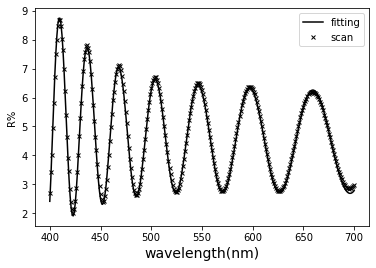

In [14]:
tk = sol.x

# figure plot
plt.plot(wl, 100*R_hypo(tk), '-k', label = 'fitting')
plt.plot(wl, R_scan, 'kx', markersize = 4, label = 'scan')
plt.xlabel('wavelength(nm)', fontsize = 14)
plt.ylabel('R%')
plt.legend(loc = 'best')
#plt.savefig('LENS_rev3.png')
plt.show()